# Volume Accumulation Oscillator (VAO)

Volume Accumulation Oscillator (VAO) use for volume times the difference of the current price and the midpoint price. As a result, is used as a divergence indicator with the high and low price. 

https://www.marketvolume.com/technicalanalysis/vao.asp

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

# fix_yahoo_finance is used to fetch data 
import fix_yahoo_finance as yf
yf.pdr_override()

In [2]:
# input
symbol = 'AAPL'
start = '2018-08-01'
end = '2019-01-01'

# Read data 
df = yf.download(symbol,start,end)

# View Columns
df.head()

[*********************100%***********************]  1 of 1 downloaded


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-08-01,199.130005,201.759995,197.309998,201.500000,199.243088,67935700
2018-08-02,200.580002,208.380005,200.350006,207.389999,205.067123,62404000
2018-08-03,207.029999,208.740005,205.479996,207.990005,205.660416,33447400
2018-08-06,208.000000,209.250000,207.070007,209.070007,206.728317,25425400
2018-08-07,209.320007,209.500000,206.759995,207.110001,204.790268,25587400


In [3]:
# Create Volume Accumulation Oscillator (VAO) indicator
df['VAO'] = df['Volume'] * (df['Adj Close'] - (df['High']+df['Low'])/2)
df.head()

,Open,High,Low,Close,Adj Close,Volume,VAO
Date,,,,,,,
2018-08-01,199.130005,201.759995,197.309998,201.500000,199.243088,67935700,-1.983101e+07
2018-08-02,200.580002,208.380005,200.350006,207.389999,205.067123,62404000,4.381494e+07
2018-08-03,207.029999,208.740005,205.479996,207.990005,205.660416,33447400,-4.848483e+07
2018-08-06,208.000000,209.250000,207.070007,209.070007,206.728317,25425400,-3.640120e+07
2018-08-07,209.320007,209.500000,206.759995,207.110001,204.790268,25587400,-8.545499e+07


In [4]:
df['Positive'] = df['VAO'] > 0

In [5]:
df['VolumePositive'] = df['Open'] < df['Adj Close']

In [6]:
df.head()

,Open,High,Low,Close,Adj Close,Volume,VAO,Positive,VolumePositive
Date,,,,,,,,,
2018-08-01,199.130005,201.759995,197.309998,201.500000,199.243088,67935700,-1.983101e+07,False,True
2018-08-02,200.580002,208.380005,200.350006,207.389999,205.067123,62404000,4.381494e+07,True,True
2018-08-03,207.029999,208.740005,205.479996,207.990005,205.660416,33447400,-4.848483e+07,False,False
2018-08-06,208.000000,209.250000,207.070007,209.070007,206.728317,25425400,-3.640120e+07,False,False
2018-08-07,209.320007,209.500000,206.759995,207.110001,204.790268,25587400,-8.545499e+07,False,False


Text(0.5,0,'Date')

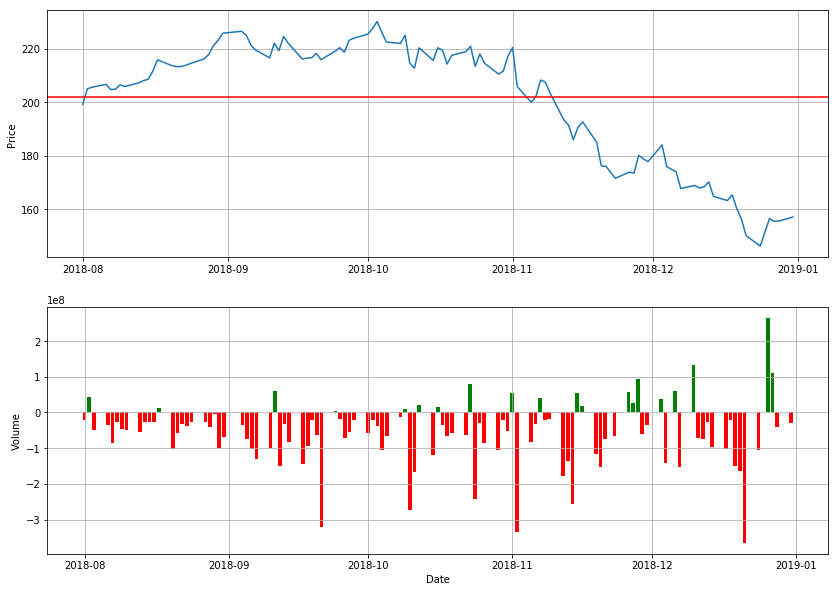

In [12]:
# Line Chart
fig = plt.figure(figsize=(14,10))
ax1 = plt.subplot(2, 1, 1)
ax1.plot(df.index, df['Adj Close'])
ax1.axhline(y=df['Adj Close'].mean(),color='r')
ax1.grid()
ax1.set_ylabel('Price')

ax2 = plt.subplot(2, 1, 2)
ax2.bar(df.index, df['VAO'], color=df.Positive.map({True: 'g', False: 'r'}))
ax2.grid()
ax2.set_ylabel('VAO')
ax2.set_xlabel('Date')

Text(0.5,0,'Date')

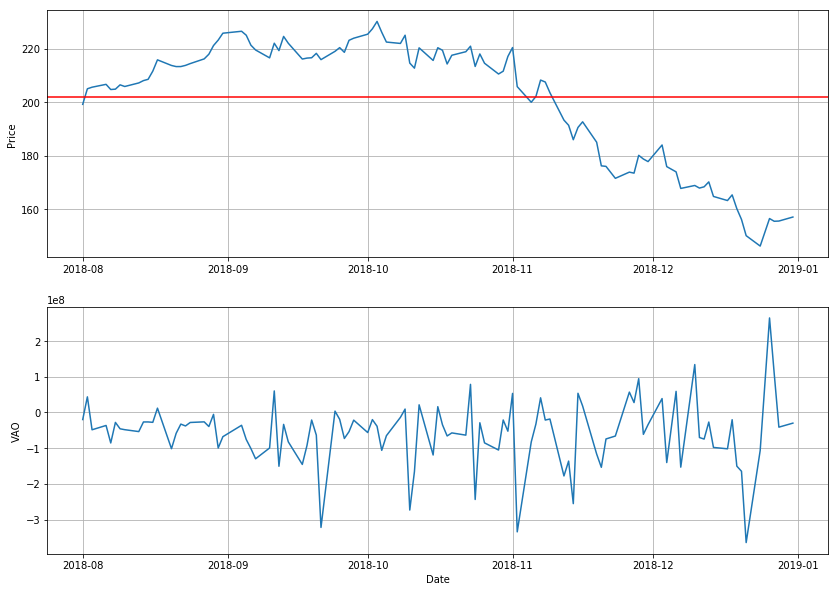

In [8]:
fig = plt.figure(figsize=(14,10))
ax1 = plt.subplot(2, 1, 1)
ax1.plot(df.index, df['Adj Close'])
ax1.axhline(y=df['Adj Close'].mean(),color='r')
ax1.grid()
ax1.set_ylabel('Price')

ax2 = plt.subplot(2, 1, 2)
ax2.plot(df.index, df['VAO'])
ax2.grid()
ax2.set_ylabel('VAO')
ax2.set_xlabel('Date')

## Candlestick with VAO

In [9]:
from matplotlib import dates as mdates
import datetime as dt

dfc = df.copy()
dfc['VAO'] = dfc['Volume'] * (dfc['Adj Close'] - (dfc['High']+dfc['Low'])/2)
dfc['Positive'] = dfc['VAO'] > 0
dfc['VolumePositive'] = dfc['Open'] < dfc['Adj Close']
dfc = dfc.dropna()
dfc = dfc.reset_index()
dfc['Date'] = mdates.date2num(dfc['Date'].astype(dt.date))
dfc.head()

,Date,Open,High,Low,Close,Adj Close,Volume,VAO,Positive,VolumePositive
0,736907.0,199.130005,201.759995,197.309998,201.500000,199.243088,67935700,-1.983101e+07,False,True
1,736908.0,200.580002,208.380005,200.350006,207.389999,205.067123,62404000,4.381494e+07,True,True
2,736909.0,207.029999,208.740005,205.479996,207.990005,205.660416,33447400,-4.848483e+07,False,False
3,736912.0,208.000000,209.250000,207.070007,209.070007,206.728317,25425400,-3.640120e+07,False,False
4,736913.0,209.320007,209.500000,206.759995,207.110001,204.790268,25587400,-8.545499e+07,False,False


Text(0.5,0,'Date')

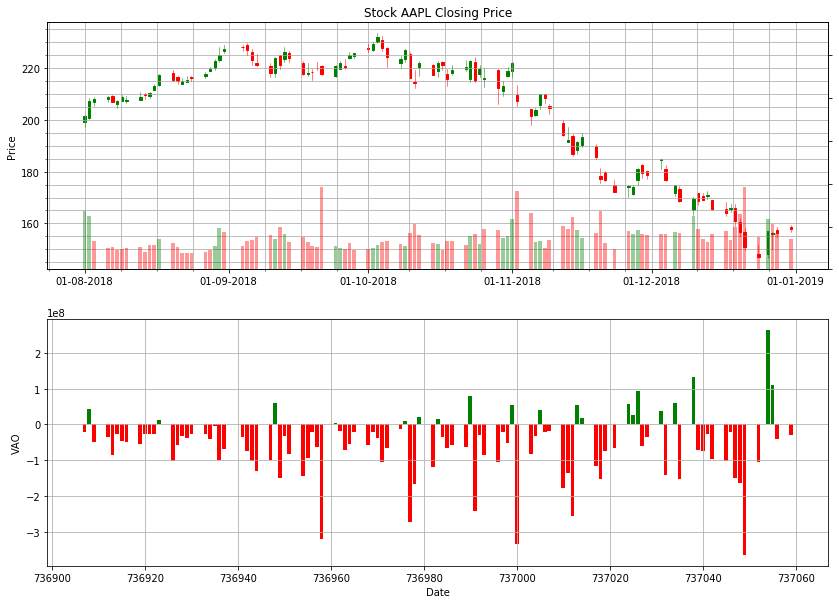

In [13]:
from mpl_finance import candlestick_ohlc

fig = plt.figure(figsize=(14,10))
ax1 = plt.subplot(2, 1, 1)
candlestick_ohlc(ax1,dfc.values, width=0.5, colorup='g', colordown='r', alpha=1.0)
ax1.xaxis_date()
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
ax1.grid(True, which='both')
ax1.minorticks_on()
ax1v = ax1.twinx()
colors = dfc.VolumePositive.map({True: 'g', False: 'r'})
ax1v.bar(dfc.Date, dfc['Volume'], color=colors, alpha=0.4)
ax1v.axes.yaxis.set_ticklabels([])
ax1v.set_ylim(0, 3*df.Volume.max())
ax1.set_title('Stock '+ symbol +' Closing Price')
ax1.set_ylabel('Price')

ax2 = plt.subplot(2, 1, 2)
ax2.bar(dfc.Date, dfc['VAO'], color=dfc.Positive.map({True: 'g', False: 'r'}))
ax2.grid()
ax2.set_ylabel('VAO')
ax2.set_xlabel('Date')

Text(0.5,0,'Date')

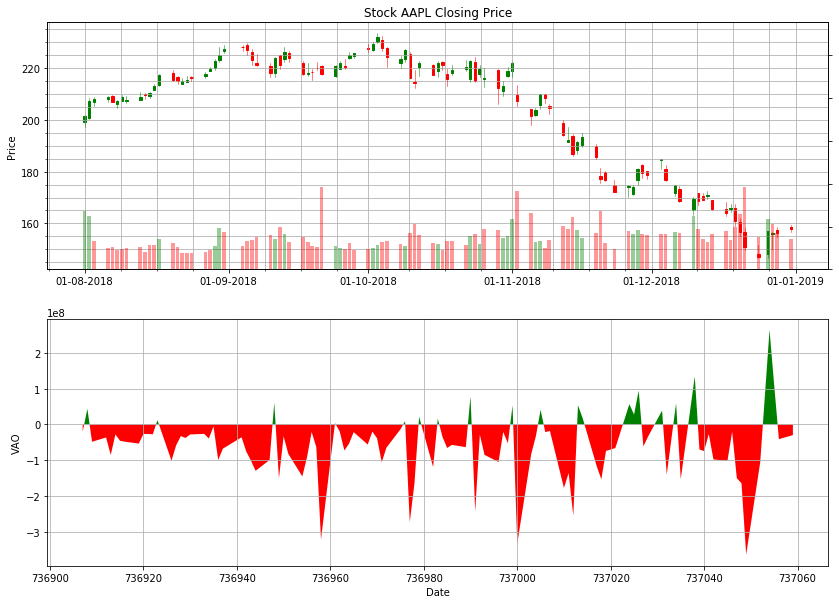

In [17]:
fig = plt.figure(figsize=(14,10))
ax1 = plt.subplot(2, 1, 1)
candlestick_ohlc(ax1,dfc.values, width=0.5, colorup='g', colordown='r', alpha=1.0)
ax1.xaxis_date()
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
ax1.grid(True, which='both')
ax1.minorticks_on()
ax1v = ax1.twinx()
colors = dfc.VolumePositive.map({True: 'g', False: 'r'})
ax1v.bar(dfc.Date, dfc['Volume'], color=colors, alpha=0.4)
ax1v.axes.yaxis.set_ticklabels([])
ax1v.set_ylim(0, 3*df.Volume.max())
ax1.set_title('Stock '+ symbol +' Closing Price')
ax1.set_ylabel('Price')

ax2 = plt.subplot(2, 1, 2)
ax2.fill_between(dfc.Date, dfc['VAO'],where= dfc['VAO'] >= 0,
                 facecolor='green', interpolate=True)
ax2.fill_between(dfc.Date, dfc['VAO'],where= dfc['VAO'] <= 0,
                 facecolor='red', interpolate=True)
ax2.grid()
ax2.set_ylabel('VAO')
ax2.set_xlabel('Date')